**UMAP for Supervised Dimension Reduction and Metric Learning:**

In [7]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white',context='poster')

In [8]:
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

In [10]:
fmnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,31,52,98,94,86,94,84,53,89,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,178,196,...,80,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,149,59,0,0,57,137,91,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,0,0,0,30,69,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,241,221,229,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,99,117,135,137,135,120,101,27,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,0,164,137,130,93,136,138,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,...,249,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,206,85,0,94,202,14,0,0,0,0,0,0,0,0,0,0


In [12]:
fmnist.target

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train, test, train_labels, test_labels = train_test_split(fmnist.data, fmnist.target, test_size=0.2)

In [15]:
train.shape

(56000, 784)

In [16]:
test.shape

(14000, 784)

In [17]:
data = fmnist.data/255.0

In [19]:
data = data.values

In [21]:
target = fmnist.target

In [23]:
target = target.values

In [32]:
target = np.array(target).astype('int')

In [34]:
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

In [24]:
import umap

In [25]:
# performing unsupervised dimensionality reduction first - setting n_neighbors to 5 cuz we're interested in
# the local structure of the data

embedding = umap.UMAP(n_neighbors=5).fit_transform(data)

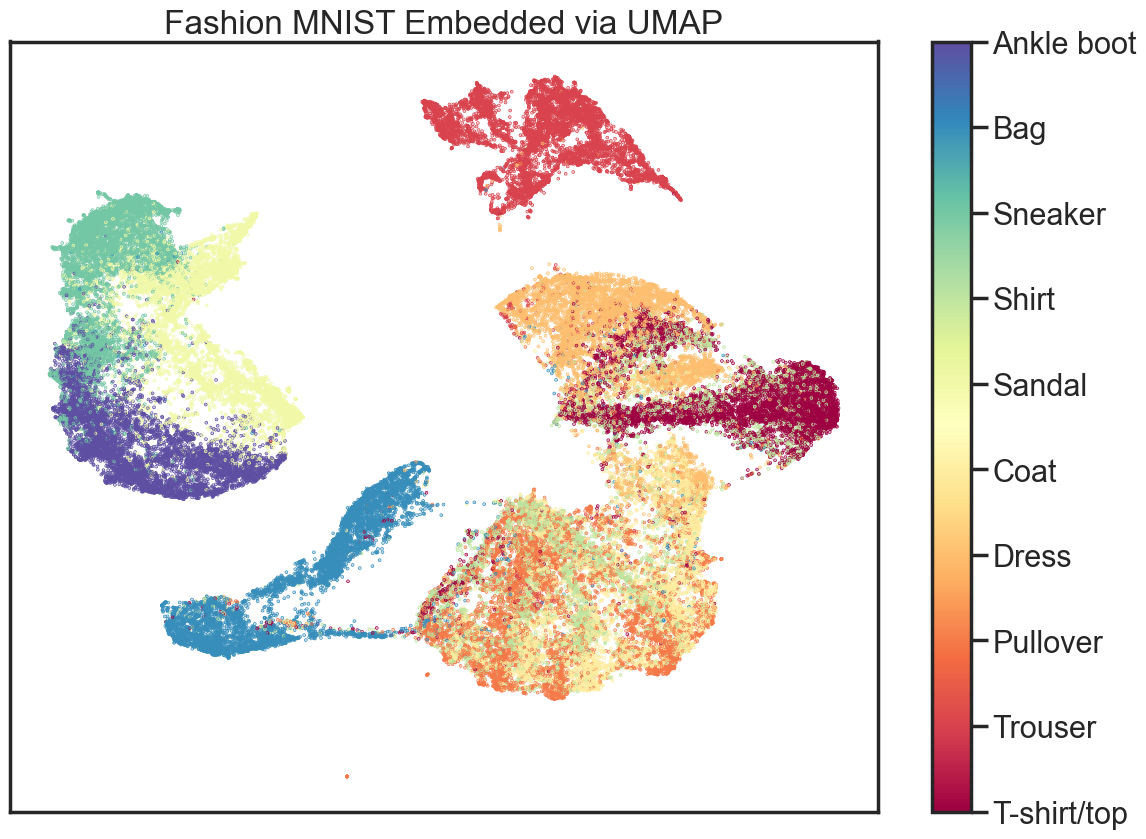

In [35]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP');

In [39]:
embedding.T

array([[ 0.27823427, 16.377676  , 10.861568  , ...,  6.703376  ,
         8.301614  ,  0.41506183],
       [ 1.6216915 ,  3.3582847 ,  4.873748  , ...,  1.6882392 ,
        11.686022  ,  8.357175  ]], dtype=float32)

**Using Labels to Separate classes (Supervised UMAP)**

In [40]:
embedding = umap.UMAP().fit_transform(data, y=target)

In [41]:
embedding

array([[15.975149  , 10.577854  ],
       [-6.6792774 ,  1.6945256 ],
       [-3.6220052 ,  4.225925  ],
       ...,
       [13.737526  , -8.837166  ],
       [ 6.1772065 , 15.862897  ],
       [14.947348  ,  0.13534354]], dtype=float32)

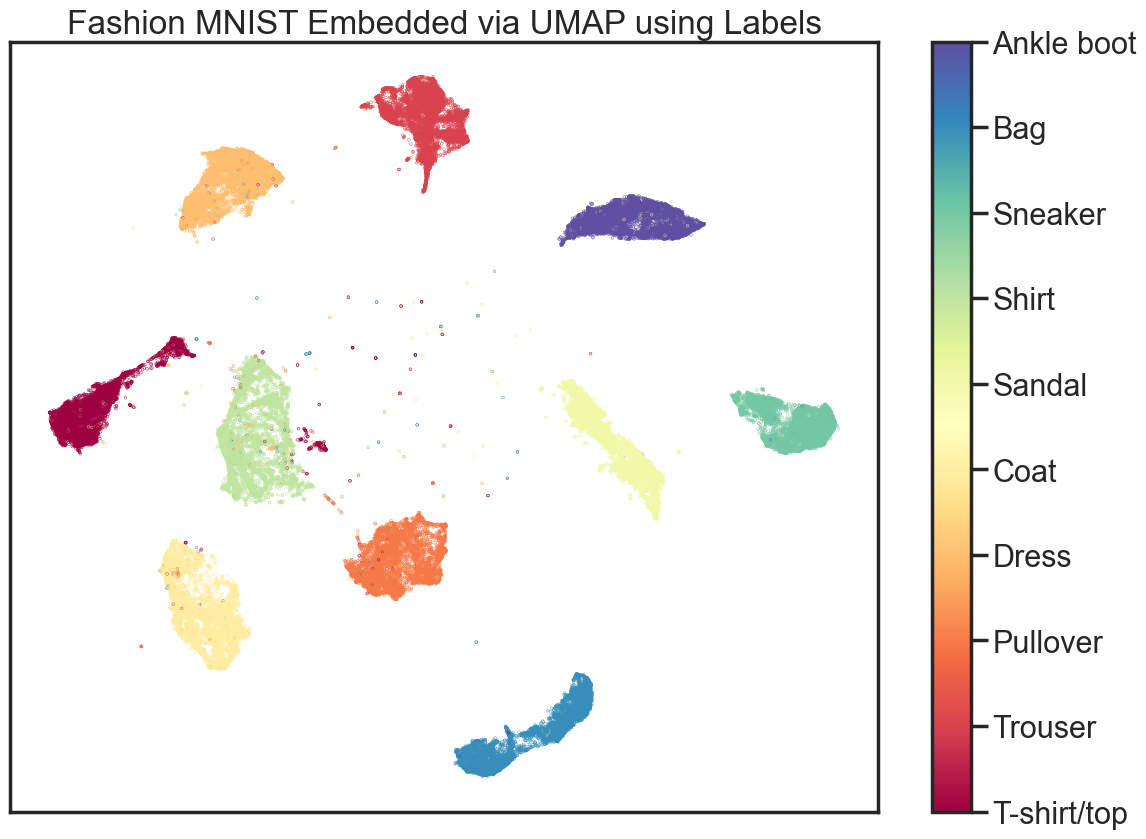

In [42]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Labels');

**Using Partial Labelling (Semi-Supervised UMAP)**

what if - we only have some of our data labelled, however and a number of items are without labels - can we still make use of the laeblled information we have - this is now a semi-supervised learning problem and yes - we can work with those cases too. 
- to set up this example - we mask some of the target information 

In [43]:
masked_target = target.copy().astype(np.int8)

In [44]:
masked_target[np.random.choice(70000, size=10000, replace=False)] = -1

Now that we've randomly masked some of the labels - we can try to perform supervised learning again. UMAP will interpret the -1 label as being an unlabelled point and learn accordingly

In [45]:
fitter = umap.UMAP().fit(data, y=masked_target)
embedding = fitter.embedding_

Again, we can look at a scatter plot of the data colored by class:

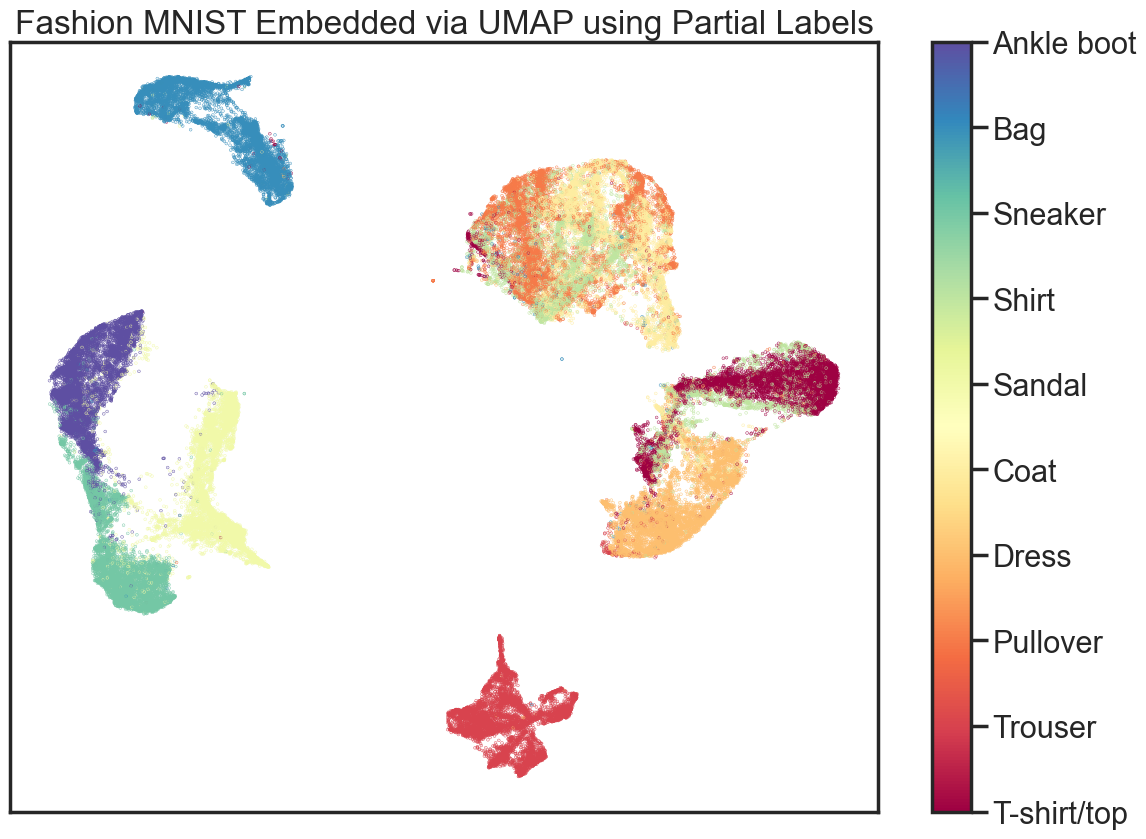

In [46]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Partial Labels');

**Training with Labels and Embedding Unlabelled Test Data (Metric Learning with UMAP)**

In [52]:
train_data = train.values
test_data = test.values

In [56]:
train_labels = np.array(train_labels.values).astype('int')

In [58]:
test_labels = np.array(test_labels.values).astype('int')

Now - we can fit a model to the training data making use of the training labels to learn a supervised embedding

In [59]:
mapper = umap.UMAP(n_neighbors=10).fit(train_data, train_labels)

In [60]:
test_embedding = mapper.transform(test_data)

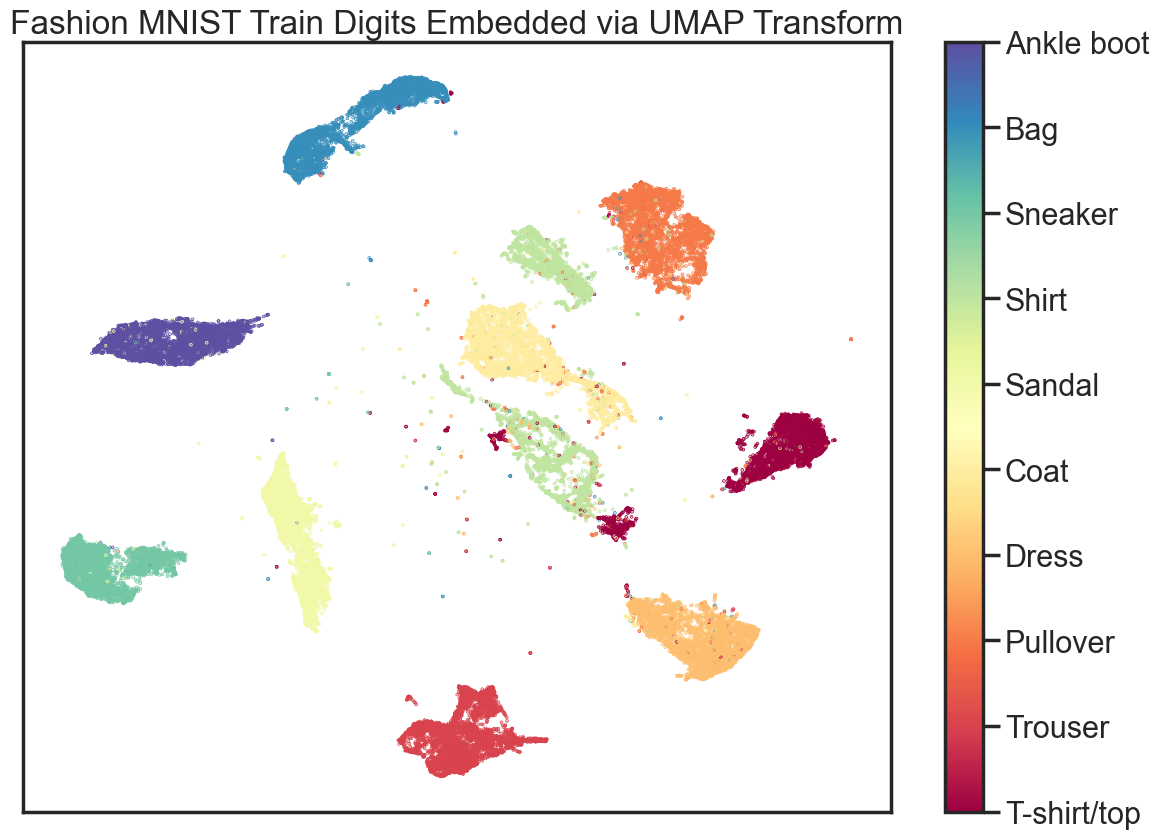

In [61]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper.embedding_.T, s=0.3, c=np.array(train_labels), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Train Digits Embedded via UMAP Transform');

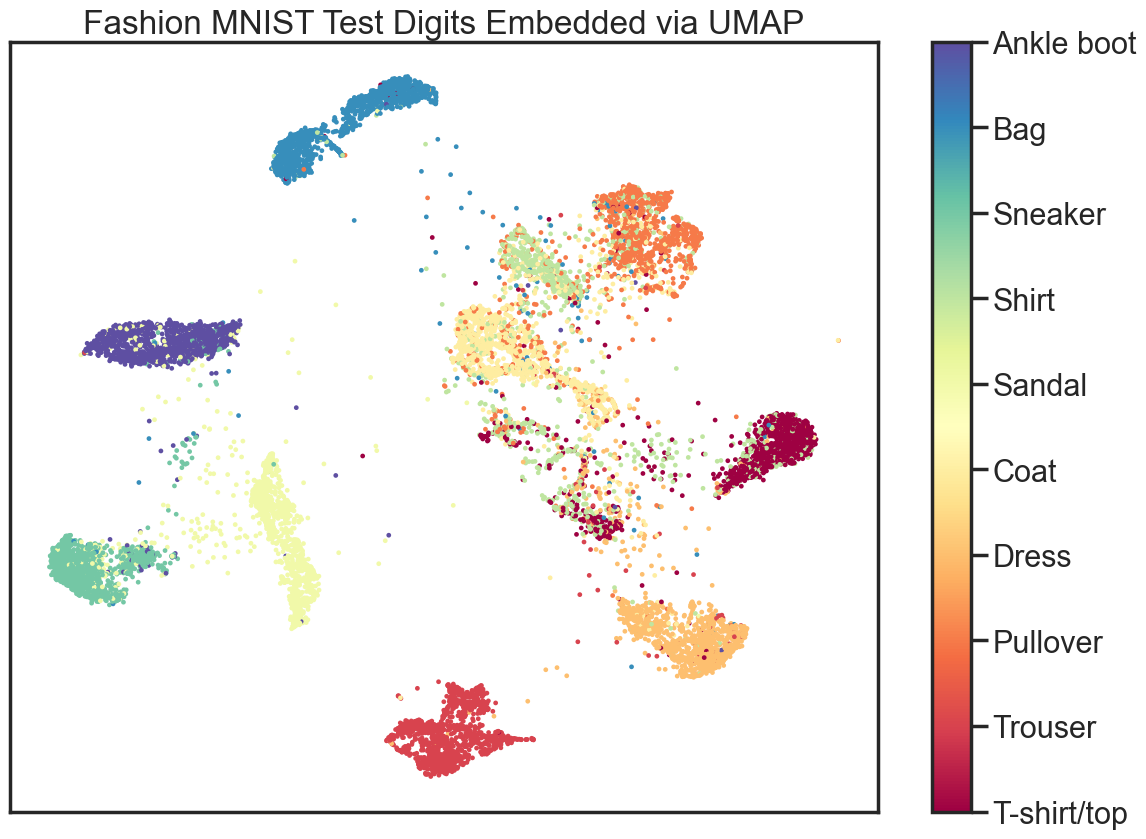

In [62]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*test_embedding.T, s=2, c=np.array(test_labels), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Test Digits Embedded via UMAP');